In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import splitfolders

# train, test split
splitfolders.ratio('H:/brain_tumor_dataset/Data/', output="'./brain_tumor_dataset_split", ratio=(0.7, 0.3))

Copying files: 253 files [00:00, 424.21 files/s]


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('./brain_tumor_dataset_split/train',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 176 images belonging to 2 classes.


In [4]:
training_set.class_indices

{'no': 0, 'yes': 1}

In [5]:
yes=np.count_nonzero(training_set.classes)
no=len(training_set.classes)-yes
print('yes:',yes,', no:',no)

yes: 108 , no: 68


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('brain_tumor_dataset_split/val/',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 77 images belonging to 2 classes.


In [7]:
yes_test=np.count_nonzero(test_set.classes)
no_test=len(test_set.classes)-yes_test
print('yes:',yes_test,', no:',no_test)

yes: 47 , no: 30


In [8]:
cnn = tf.keras.models.Sequential() # Part 2 - Building and Initialising the CNN

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=[256,256,3])) # Step 1 - Convolution

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) # Step 2 - Pooling

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu'))  # Adding a second convolutional layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten()) # Step 3 - Flattening

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) # Step 4 - Full Connection

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))# Step 5 - Output Layer

In [15]:
# Part 3 - Training and Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 119072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15241344  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [17]:
history=cnn.fit(x = training_set, epochs = 20 ,validation_data=test_set)

Epoch 1/20
6/6 [==============================] - 108s 14s/step - loss: 2.5991 - accuracy: 0.5057 - val_loss: 0.6302 - val_accuracy: 0.8182
Epoch 2/20
6/6 [==============================] - 28s 4s/step - loss: 0.6250 - accuracy: 0.6420 - val_loss: 0.5580 - val_accuracy: 0.8182
Epoch 3/20
6/6 [==============================] - 30s 4s/step - loss: 0.5970 - accuracy: 0.6875 - val_loss: 0.5561 - val_accuracy: 0.7273
Epoch 4/20
6/6 [==============================] - 31s 5s/step - loss: 0.5960 - accuracy: 0.7045 - val_loss: 0.5805 - val_accuracy: 0.6753
Epoch 5/20
6/6 [==============================] - 32s 5s/step - loss: 0.6099 - accuracy: 0.7102 - val_loss: 0.5467 - val_accuracy: 0.7403
Epoch 6/20
6/6 [==============================] - 30s 4s/step - loss: 0.5476 - accuracy: 0.7330 - val_loss: 0.5350 - val_accuracy: 0.7532
Epoch 7/20
6/6 [==============================] - 30s 4s/step - loss: 0.5423 - accuracy: 0.7330 - val_loss: 0.5016 - val_accuracy: 0.7403
Epoch 8/20
6/6 [================

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

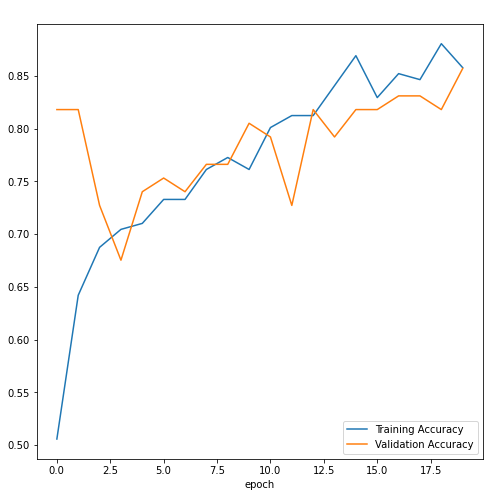

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontdict = {'fontsize': '14',
                              'color': 'white'})
plt.xlabel('epoch')
plt.show()

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

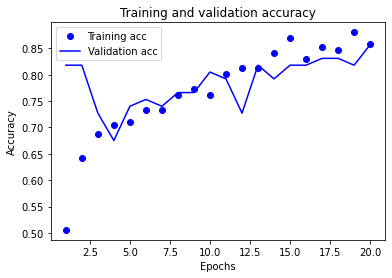

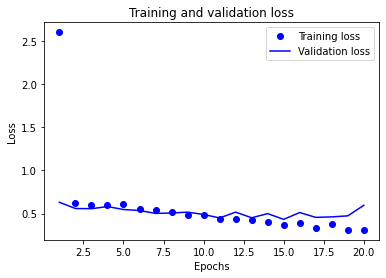

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
cnn.evaluate(training_set)

6/6 [==============================] - 12s 1s/step - loss: 0.2902 - accuracy: 0.8807


[0.2901821434497833, 0.8806818127632141]

In [22]:
cnn.evaluate(test_set)

3/3 [==============================] - 6s 460ms/step - loss: 0.5952 - accuracy: 0.8571


[0.5952011942863464, 0.8571428656578064]

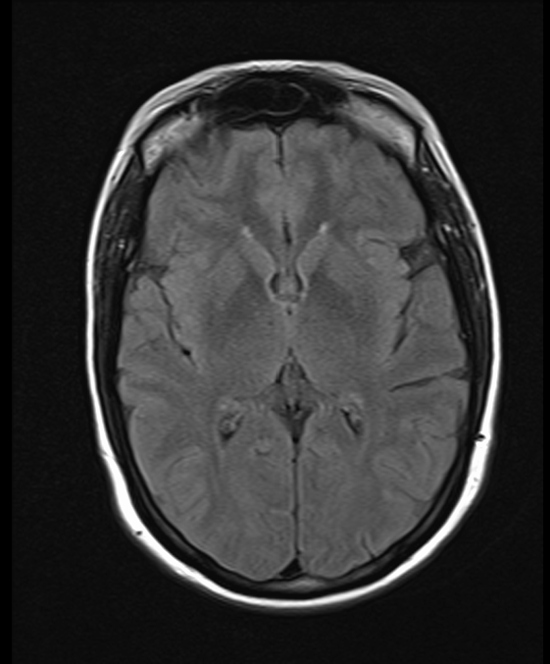

Actual: No
Predicted: No


In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/no/no 96.jpg'))
test_image = image.load_img('./brain_tumor_dataset_split/val/no/no 96.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: No")
print("Predicted:", prediction)

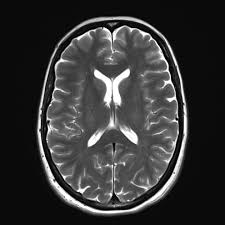

Actual: No
Predicted: No


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/no/39 no.jpg'))
test_image = image.load_img('./brain_tumor_dataset_split/val/no/39 no.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: No")
print("Predicted:", prediction)

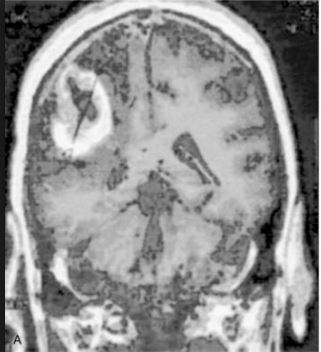

Actual: Yes
Predicted: Yes


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/yes/Y147.JPG'))
test_image = image.load_img('./brain_tumor_dataset_split/val/yes/Y147.JPG', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: Yes")
print("Predicted:", prediction)

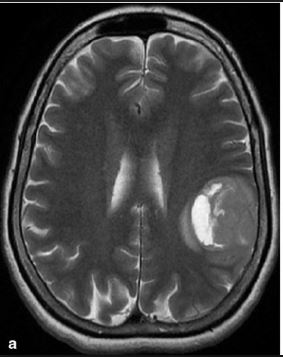

Actual: Yes
Predicted: Yes


In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/yes/Y99.JPG'))
test_image = image.load_img('./brain_tumor_dataset_split/val/yes/Y99.JPG', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: Yes")
print("Predicted:", prediction)

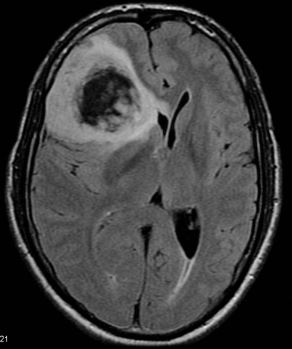

Actual: Yes
Predicted: No


In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image


from IPython.display import display, Image
display(Image(filename='./brain_tumor_dataset_split/val/yes/Y258.JPG'))
test_image = image.load_img('./brain_tumor_dataset_split/val/yes/Y258.JPG', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

print("Actual: Yes")
print("Predicted:", prediction)

In [28]:
#  Part 5 - Confusion Matrix and Metrics   to get X_test, Y_test from the test_set

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('brain_tumor_dataset_split/val/',
                                            target_size = (256, 256),
                                            batch_size = 77,
                                            class_mode = 'binary')



X_test, Y_test= next(test_set)
print(Y_test.shape)

Found 77 images belonging to 2 classes.
(77,)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

Y_pred=cnn.predict_classes(X_test)
Y_pred=tf.reshape(Y_pred, (77,))

In [30]:
print("Confusion matrix:")
print(confusion_matrix(Y_test,Y_pred))
print("Test Accuracy:",accuracy_score(Y_test,Y_pred))
print("Classification report:")
print(classification_report(Y_test,Y_pred))

Confusion matrix:
[[26  4]
 [ 7 40]]
Test Accuracy: 0.8571428571428571
Classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        30
         1.0       0.91      0.85      0.88        47

    accuracy                           0.86        77
   macro avg       0.85      0.86      0.85        77
weighted avg       0.86      0.86      0.86        77



<AxesSubplot:>

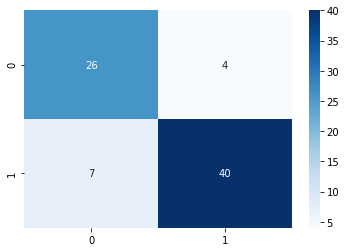

In [31]:
import seaborn as sns
x=confusion_matrix(Y_test,Y_pred)
ax=plt.subplot()
sns.heatmap(x, annot=True, cmap='Blues',ax=ax)  # cmap='OrRd'

# labels, title and ticks
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['No Tumor', 'Tumor']); ax.yaxis.set_ticklabels(['No Tumor', 'Tumor']);
